初值问题：

$$ \left\{
\begin{aligned}
    y''&=4y\\
    y(0)&=1\\
    y(1)&=3
\end{aligned}
\right.$$

The solution to the initial value problem is y(1)=2.999999884532403


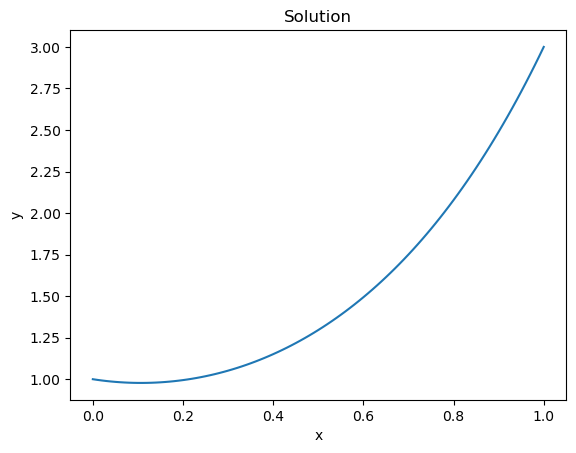

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def f(x, y):
    """
    定义微分方程组
    """
    return [y[1], 4*y[0]]

def shoot(z0):
    """
    求解微分方程初值问题
    """
    sol = solve_ivp(f, [0, 1], [1, z0], dense_output=True)
    y1 = sol.sol(1)[0]  # 取得数值解在 x=1 处的值
    return y1 - 3  # 计算数值解在 x=1 处的偏差

# 使用二分法求解初始条件 z0 的值
a, b = -10, 10
while b - a > 1e-6:
    c = (a + b) / 2
    if shoot(c) * shoot(a) <= 0:
        b = c
    else:
        a = c
z0 = (a + b) / 2

# 求解初值问题并输出结果
sol = solve_ivp(f, [0, 1], [1, z0], dense_output=True)
x = np.linspace(0, 1, 101)
y = sol.sol(x)[0]
print(f"The solution to the initial value problem is y(1)={y[-1]}")

# 输出 y 和 x 的关系图像
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution")
plt.show()



随机微分方程

$W(t),0 \leq t \leq T$

1.$W(0)=0 (prof=1)$

2.$$

randn('state',100)
T=1;N=500;dt=T/N;
dW=zeros(1,N);
W=zeros(1,N);

dW(1)=sqrt(dt)*randn;
W(1)=dW(1);
for j=2:N
    dW(j)=sqrt(dt)*randn;
    W(j)=W(j-1)+dW(j);
end

plot([0:dt:T],[0,W],'r-')


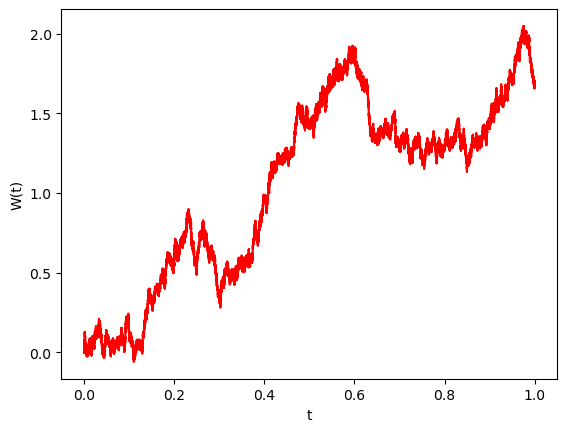

In [31]:
import numpy as np
import matplotlib.pyplot as plt

T = 1
N = 500000
dt = T / N
dW = np.zeros(N)
W = np.zeros(N)

dW[0] = np.sqrt(dt) * np.random.randn()
W[0] = dW[0]
for j in range(1, N):
    dW[j] = np.sqrt(dt) * np.random.randn()
    W[j] = W[j - 1] + dW[j]

t = np.linspace(0, T, N+1)
plt.plot(t, np.concatenate(([0], W)), 'r-')
plt.xlabel('t')
plt.ylabel('W(t)')
plt.show()


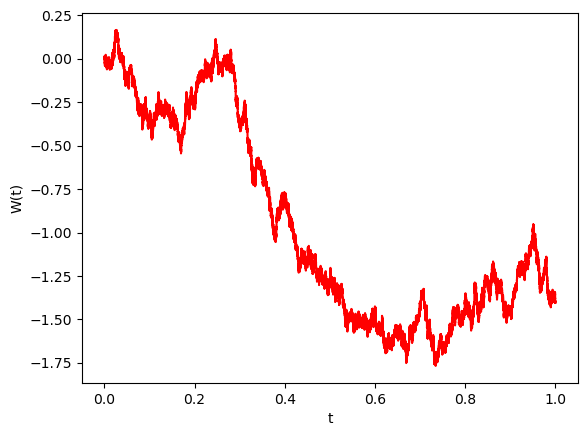

In [30]:
import numpy as np
import matplotlib.pyplot as plt

T = 1
N = 500000
dt = T / N
dW = np.sqrt(dt) * np.random.randn(N)
W = np.cumsum(dW)

t = np.linspace(0, T, N + 1)
plt.plot(t, np.concatenate(([0], W)), 'r-')
plt.xlabel('t')
plt.ylabel('W(t)')
plt.show()


randn(’state’,100) % set the state of randn
T = 1; N = 5 00; dt = T/N; t = [dt:dt:1];
M = 1000; % M paths simultaneously
dW = sqrt(dt)*randn(M,N); % increments
W = cumsum(dW,2); % cumulative sum
U = exp(repmat(t,[M 1]) + 0.5*W);
Umean = mean(U);
plot([0,t],[1,Umean],’b-’), hold on % plot mean over M paths
plot([0,t],[ones(5,1),U(1:5,:)],’r--’), hold off % plot 5 individual paths
xlabel(’t’,’FontSize’,16)
ylabel(’U(t)’,’FontSize’,16,’Rotation’,0,’HorizontalAlignment’,’right’)
legend(’mean of 1000 paths’,’5individual paths’,2)
averr = norm((Umean - exp(9*t/8)),’inf’)

0.05149244372449813


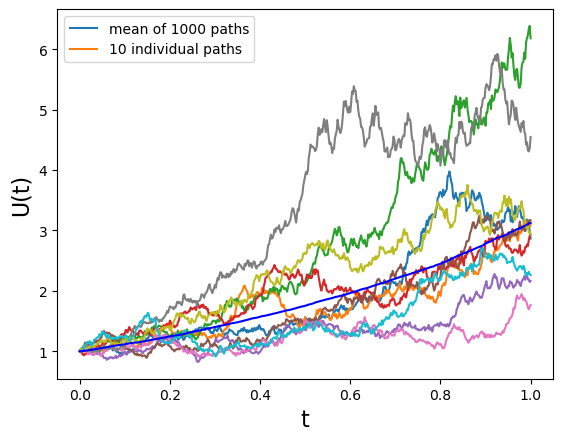

In [74]:
import numpy as np
import matplotlib.pyplot as plt


T = 1
N = 500
dt = T / N
t = np.arange(dt, T + dt, dt)

M = 1000
dW = np.sqrt(dt) * np.random.randn(M, N)
W = np.cumsum(dW, axis=1)
U = np.exp(t + 0.5 * W)
Umean = np.mean(U, axis=0)

for i in range(10):
    plt.plot([0] + t.tolist(), [1] + U[i].tolist())

plt.plot([0] + t.tolist(), [1] + Umean.tolist(), 'b-')
plt.plot()
plt.xlabel('t', fontsize=16)
plt.ylabel('U(t)', fontsize=16)
plt.legend(['mean of 1000 paths', '10 individual paths'], loc=2)
averr = np.linalg.norm((Umean - np.exp(9 * t / 8)), np.inf)
print(averr)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = 1
N = 500000
dt = T / N
dW = np.sqrt(dt) * np.random.randn(N)
W = np.cumsum(dW)

I = 0
for i in range(N-1):
    I += (W[i+1]+W[i])*dt/2

print(I)

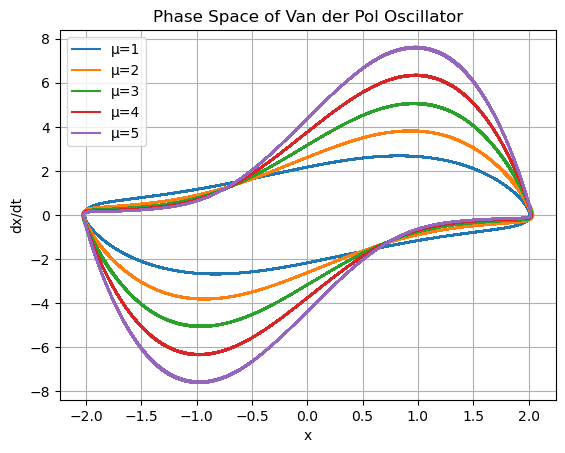

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

def vdp(t, y, μ):
    x, dx_dt = y
    dy_dt = [dx_dt, μ * (1 - x**2) * dx_dt - x]
    return dy_dt

# 定义计算周期的函数
def calculate_period(time, signal):
    peaks, _ = find_peaks(signal)
    periods = np.diff(time[peaks])
    avg_period = np.mean(periods)
    return avg_period
def solvevdp(μ, t_start, t_end, num_points, initial_conditions):
    # 假设 vdp() 和 calculate_period() 函数已定义
    # 初始化数据存储数组
    x_list = []
    dx_dt_list = []

    # 解 van der Pol 振荡器的微分方程
    solution = solve_ivp(lambda t, y: vdp(t, y, μ),
                     [t_start, t_end],
                     initial_conditions,
                     t_eval=np.linspace(t_start, t_end, num_points))
    
    # 提取解的轨迹
    x = solution.y[0]
    dx_dt = solution.y[1]

    # 去除最开始的收敛过程
    start_index = int(num_points * 0.2)  # 从轨迹的 20% 处开始
    x = x[start_index:]
    dx_dt = dx_dt[start_index:]

    # 将数据存储到数组中
    x_list.append(x)
    dx_dt_list.append(dx_dt)

    return x_list, dx_dt_list

# 创建一个图形窗口
fig, ax = plt.subplots()

# 绘制相空间图
for μ in range(1, 6):
    x, dx_dt = solvevdp(μ, 0, 3000, 100000, [1.0, 0.0])
    ax.plot(x[0], dx_dt[0], label=f'μ={μ}')

# 设置图形标题、坐标轴标签和图例
ax.set_title('Phase Space of Van der Pol Oscillator')
ax.set_xlabel('x')
ax.set_ylabel('dx/dt')
ax.legend()

# 启用网格
ax.grid(True)

# 显示图形
plt.show()
